##Partial Differential Equations

Never Say Never - Documentary on Belousov–Zhabotinsky Reaction BZ

https://www.youtube.com/watch?v=FvXwVZPOoBI


Image Kernels Explained Visually

https://setosa.io/ev/image-kernels/

In [1]:
#imports libraries
import numpy as np
from skimage import io as io
import matplotlib.pyplot as plt
from scipy import signal
import torch.nn.functional as F
from torch.nn.functional import *
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import time
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

In [2]:
#defines color maps, plots, and animations
def make_ani(A, colormap='gray'):

    fig, ax = plt.subplots()
    im = ax.imshow(A[0,:,:], cmap = colormap);
    ax.axis('off')
    fig.set_size_inches(12, 12)

    def animate(data, im):
        im.set_data(data)

    def step():
        for i in range(A.shape[0]):
            data = A[i,:,:]
            yield data

    return animation.FuncAnimation(fig, animate, step, interval=100, repeat=True, fargs=(im,))

In [3]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(8, 8)
    plt.show()

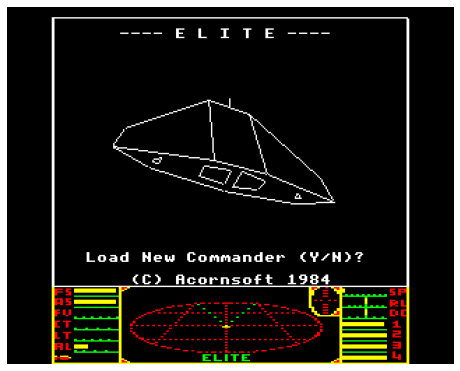

In [4]:
#retrieves image
image = io.imread("https://www.filfre.net/wp-content/uploads/2013/12/bbc4.png")
plot(image)

In [5]:
image.shape

(512, 640, 4)

In [6]:
#returns matrix
a = np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]])

In [7]:
a

matrix([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]])

In [8]:
image = np.mean(image, axis=2)

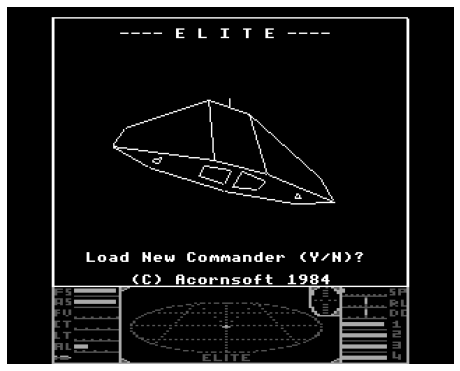

In [9]:
plot(image)

In [10]:
image.shape

(512, 640)

In [11]:
#convolves image
y = signal.convolve2d(image, a, mode='same')

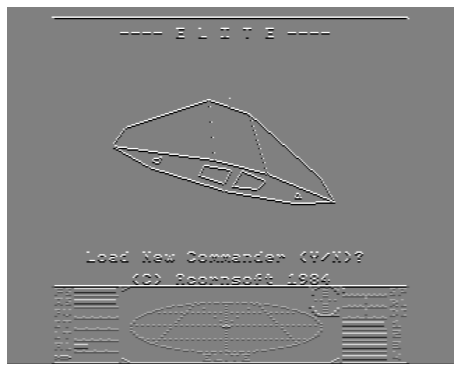

In [12]:
plot(y)

In [13]:
a = np.transpose(a)

In [14]:
a

matrix([[ 1,  0, -1],
        [ 2,  0, -2],
        [ 1,  0, -1]])

In [15]:
y = signal.convolve2d(image, a, mode='same')

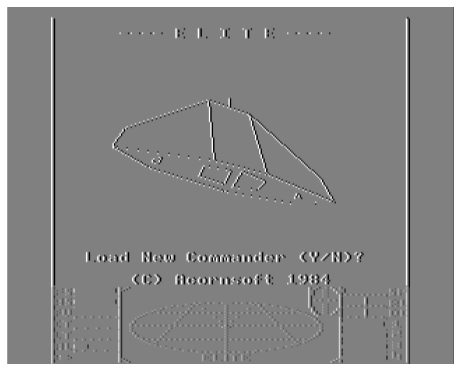

In [16]:
plot(y)

In [17]:
#generates a 25 by 25 matrix
b = np.random.random((25,25))

In [18]:
#convolves using 2 random imputs from the matrix
y = signal.convolve2d(image, b)

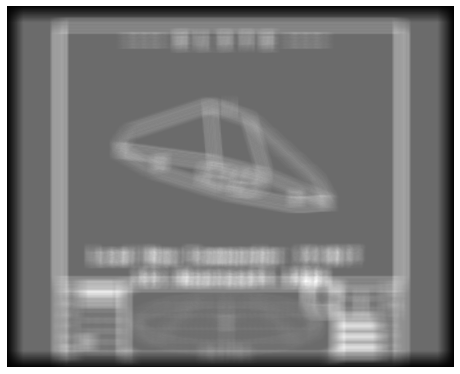

In [19]:
plot(y)

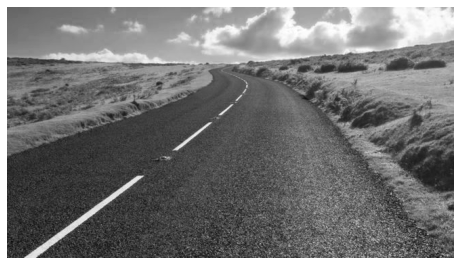

In [20]:
x = io.imread("https://ichef.bbci.co.uk/news/660/cpsprodpb/C342/production/_88068994_thinkstockphotos-493881770.jpg")
x = x[:,:,0]
x = x.astype(float)
x /= 255.0
plot(x)

In [21]:
#convolution of 2 dimensions
def conv2(x,f):
    x2 = np.zeros(x.shape)
    for i in range(1,x.shape[0]-1):
        for j in range(1,x.shape[1]-1):
        
            x2[i,j] = f[0,0] * x[i-1,j-1]  \
            +         f[0,1] * x[i-1,j]    \
            +         f[0,2] * x[i-1,j+1]  \
            +         f[1,0] * x[i,j-1]    \
            +         f[1,1] * x[i,j]      \
            +         f[1,2] * x[i,j+1]    \
            +         f[2,0] * x[i+1,j-1]  \
            +         f[2,1] * x[i+1,j]    \
            +         f[2,2] * x[i+1,j+1]
            
    return x2

In [22]:
#generates a matrix
a = np.matrix([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
# a = np.matrix([[1,2,1],[0,0,0],[-1,-2,-1]])
# a = np.matrix([[1,1,1],[1,1,1],[1,1,1]])
# a = 5*np.random.random((3,3))-5*np.random.random((3,3))

In [23]:
a

matrix([[-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]])

In [24]:
z = conv2(x,a)

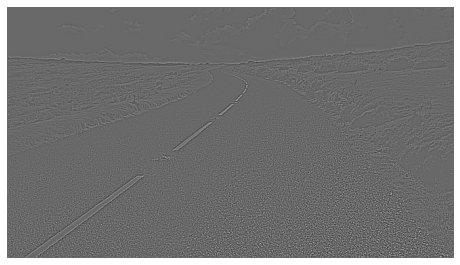

In [25]:
plot(z)

[[-0.71133744  0.85281177  0.37303974]
 [-0.40055925  0.63621102  0.57407571]
 [-0.18047731 -0.55491557 -0.56648316]]


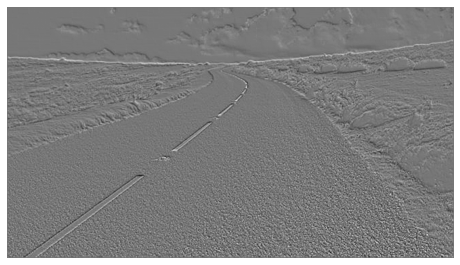

[[-0.73739718 -0.41597203  0.01056412]
 [ 0.05861451 -0.15163478  0.69245317]
 [ 0.15221055  0.8720424  -0.50677851]]


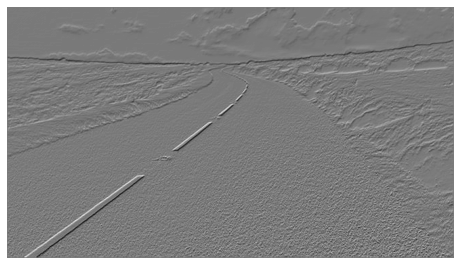

[[-0.94606533  0.50020958 -0.64346237]
 [ 0.81242297 -0.93179708  0.86044722]
 [-0.30500383 -0.48339146  0.44373511]]


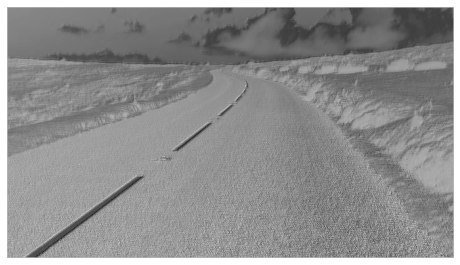

In [26]:
for i in range(3):
    a = 2*np.random.random((3,3))-1
    print(a)
    z=conv2(x,a)
    plot(z)

In [27]:
#Homemade Conv Loop Timing
a = 2*np.random.random((9,3,3))-1
start_time = time.time()
for i in range(9):
    
    z=conv2(x,a[i,:,:])

print("--- %s seconds ---" % (time.time() - start_time))

--- 11.24422001838684 seconds ---


In [28]:
#Optimized Code Timing
a = 2*np.random.random((9,3,3))-1
start_time = time.time()
for i in range(9):
    
    z = signal.convolve2d(x,a[i,:,:])

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.10703563690185547 seconds ---


In [29]:
#GPU Processing Timing, No Loop, 96 filters!!
a2 = 2*np.random.random((96,1,3,3))-1
x2 = torch.tensor(x).cuda()
a2 = torch.tensor(a2).cuda()
x2 = x2[None,None,:,:]

start_time = time.time()
z = conv2d(x2,a2)
print("--- %s seconds ---" % (time.time() - start_time))

RuntimeError: ignored

In [ ]:
z.shape

In [ ]:
image = io.imread("http://harborparkgarage.com/img/venues/pix/aquarium2.jpg").astype(float)/255.0
plot(image)

In [ ]:
image.shape

In [ ]:
plot(np.random.random((11,11,3)))

In [ ]:
image = np.transpose(image, (2, 0, 1))

In [ ]:
f = np.random.random((1,3,11,11))

In [ ]:
image.shape

In [ ]:
image = image[None,:,:,:]

In [ ]:
image.shape,f.shape

In [ ]:
f =  torch.tensor(f)
image =  torch.tensor(image)

In [ ]:
image2 = F.conv2d(image,f)

In [ ]:
image2 = image2.numpy()

In [ ]:
image2.shape

In [ ]:
image2[0,0,:,:].shape

In [ ]:
plot(image2[0,0,:,:])

In [ ]:
image = io.imread("http://ian-albert.com/games/super_mario_bros_maps/mario-2-2.gif")
image = image[:,0:700,:]
plot(image)

In [ ]:
coin = image[185:200,224:239,:]

In [ ]:
plot(coin)

In [ ]:
image = image[60:,0:700,:]
plot(image)

In [ ]:
def scale1(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [ ]:
image=np.mean(image,axis=2)
coin=np.mean(coin,axis=2)

image=scale1(image)
coin=scale1(coin)

In [ ]:
plot(image)
plot(coin)

In [ ]:
coin.shape

In [ ]:
image = image - np.mean(image)
coin = coin - np.mean(coin)

In [ ]:
image.shape,coin.shape

In [ ]:
z = signal.convolve2d(image, np.rot90(coin, 2))

In [ ]:
plot(z)

In [ ]:
plot(z==np.max(z))

In [ ]:
[y,x] = np.where(z == np.amax(z))

In [ ]:
plt.plot(x,-y,'.')

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(image, cmap = 'gray')
ax.axis('off')
ax.scatter(x-6, y-6, c='red', s=40)
fig.set_size_inches(18, 10)

In [ ]:
def conv2(w,f): #GPU conv with padding

    n = conv2d(w.type(torch.int),f.type(torch.int))
    n = pad(n, (1, 1, 1, 1)) #add ones to the sides of the matrix

    return n

#Game of Life

In [ ]:
w = (np.random.random((100,100)) > 0.5) #game of life world grid w
f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

In [ ]:
plot(w)

In [ ]:
steps = 1000
A = torch.zeros((steps,100,100)) # storage for frames for animation
w = torch.tensor(w.astype(int))[None,None,:,:]
f = torch.tensor(f.astype(int))[None,None,:,:]

In [ ]:
for i in range(steps):

    n = conv2(w,f)
    
    w = (w * (n==2)) + (n==3)
    
    A[i] = w

In [ ]:
make_ani(A)

#Surface Tension Model

In [ ]:
w = (np.random.random((100,100)) > 0.5).astype(int)
f = np.matrix([[1,1,1],[1,1,1],[1,1,1]])

In [ ]:
steps = 10
A = torch.zeros((steps,100,100)) # storage for frames for animation
w = torch.tensor(w)[None,None,:,:]
f = torch.tensor(f)[None,None,:,:]

In [ ]:
for i in range(steps):

    n = conv2(w,f)

    w = ~((n<4) + (n==5))
    
    A[i] = w

In [ ]:
make_ani(A)

#Forest Fire Model

In [ ]:
# veg = {empty=0 burning=1 green=2}

In [ ]:
Plightning = 0.00005
Pgrowth = 0.01

w = (np.random.random((100,100)) > 0.5).astype(int)
f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

steps = 1000
A = torch.zeros((steps,100,100)) # storage for frames for animation
w = torch.tensor(w)[None,None,:,:]
f = torch.tensor(f)[None,None,:,:]

In [ ]:
for i in range(steps):
    
    n = w == 1
    
    n = conv2(n,f)
    
    w =  2*((w == 2)).type(torch.int)                                                \
    -      ((w == 2) * ( n > 0 ) ).type(torch.int)                                   \
    -      ((w == 2) * ( np.random.random((100,100)) < Plightning)).type(torch.int)  \
    +    2*((w == 0) * ( np.random.random((100,100)) < Pgrowth)).type(torch.int)
    
    A[i] = w

#Nonlinear Waves

In [ ]:
w = np.random.random((100,100)) < 0.1
f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

t  = 6  #center value=6; 7 makes fast pattern; 5 analiating waves
t1 = 3  #center value=3

steps = 1000
A = torch.zeros((steps,100,100)) # storage for frames for animation
w = torch.from_numpy(w)[None,None,:,:]
f = torch.from_numpy(f)[None,None,:,:]

In [ ]:
for i in range(1000):
    
    n = (w>0)&(w<t)
    
    n = conv2(n,f)
    
    w = ((w==0) & (n>=t1)) \
    +  2*(w==1)            \
    +  3*(w==2)            \
    +  4*(w==3)            \
    +  5*(w==4)            \
    +  6*(w==5)            \
    +  7*(w==6)            \
    +  8*(w==7)            \
    +  9*(w==8)            \
    +  0*(w==9)            \
    
    A[i] = w

In [ ]:
make_ani(A)

In [ ]:
#Wireword Wire
#{empty=0 electron_head=1 electron_tail=2, wire=3}

In [ ]:
w = np.zeros((100,100))
w[50,:] = 3
w[50,5] = 2
w[50,6] = 1

f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

steps = 1000
A = torch.zeros((steps,100,100)) # storage for frames for animation
w = torch.from_numpy(w)[None,None,:,:]
f = torch.from_numpy(f)[None,None,:,:]

In [ ]:
for i in range(100):
    
    n=w==1
    
    n = conv2(n,f)
    
    w = 1*((w==3)& ((n==1) | (n==2)))                 \
    +   3*((w==3)& ((n!=1) & (n!=2)))                 \
    +   0*(w==0)                    \
    +   2*(w==1)                    \
    +   3*(w==2)                    \
    
    A[i] = w

In [ ]:
make_ani(A, colormap='magma')

#Wireworld Oscillator

In [ ]:
w = np.zeros((100,100))
w[50,15:-1] = 3
w[48,5:15] = 3
w[52,5:15] = 3
w[49:52,4] = 3
w[49:52,15] = 3
w[52,14] = 1
w[52,13] = 2

f = np.matrix([[1,1,1],[1,0,1],[1,1,1]])

steps = 1000
A = torch.zeros((steps,100,100)) # storage for frames for animation
w = torch.from_numpy(w)[None,None,:,:]
f = torch.from_numpy(f)[None,None,:,:]

In [ ]:
for i in range(steps):
    
    n = w == 1
    
    n = conv2(n,f)

    w = 0*((w==0))                                    \
    +   2*((w==1))                                    \
    +   3*((w==2))                                    \
    +   3*((w==3)& ((n!=1) & (n!=2)))                 \
    +   1*((w==3)& ((n==1) | (n==2)))                 \
    
    A[i] = w

In [ ]:
make_ani(A, colormap='magma')

#FitzHugh-Nagumo Reaction Diffusion 

In [ ]:
def laplacian(U):
    n = conv2d(U,laplace)
    n = pad(n, (1, 1, 1, 1),'circular')
    return n

In [ ]:
laplace = 0.5*np.array([[0.5, 1.0, 0.5],
                        [1.0, -6., 1.0],
                        [0.5, 1.0, 0.5]])

In [ ]:
N = 256
h = 0.05

A = np.zeros([N, N], dtype=np.float32)

A = A + -0.7

noise_shape = A[:,120:130].shape

A[:,120:130] = (np.random.normal(0.9,0.05,size=noise_shape))

B = np.zeros([N, N], dtype=np.float32)

B = B + -0.3

In [ ]:
w1 = plot(A)

In [ ]:
a0 = -0.1
a1 = 2
epsilon = 0.05
delta = 4
k1 = 1
k2 = 0
k3 = 1

In [ ]:
A = torch.from_numpy(A)[None,None,:,:].cuda()
B = torch.from_numpy(B)[None,None,:,:].cuda()
laplace = torch.from_numpy(laplace)[None,None,:,:].type(torch.float).cuda()

In [ ]:
steps = 100
P = torch.zeros((steps,N,N)) # storage for frames for animation

In [ ]:
j = 0 
for i in range(steps*1000):
    
    A += h*( k1*A - k2*A**2 - A**3 - B + laplacian(A))
    B += h*( epsilon*(k3*A - a1*B -a0) + delta*laplacian(B)     )

    if i % 1000 == 0:
        P[j] = A
        j += 1

In [ ]:
make_ani(P)

#Gray Scott Reaction Diffusion 

In [ ]:
laplace = 0.5*np.array([[0.5, 1.0, 0.5],
                        [1.0, -6., 1.0],
                        [0.5, 1.0, 0.5]])

In [ ]:
laplace = torch.from_numpy(laplace)[None,None,:,:].type(torch.float).cuda()

In [ ]:
def laplacian(U):
    n = conv2d(U,laplace)
    n = pad(n, (1,1,1,1))
    n = pad(n, (0,0,0,0))
    return n

In [ ]:
(Du, Dv, F, k) = ((0.16, 0.08, 0.035, 0.065)) # Bacteria 1
# (Du, Dv, F, k) = ((0.14, 0.06, 0.035, 0.065)) # Bacteria 2
# (Du, Dv, F, k) = ((0.16, 0.08, 0.060, 0.062)) # Coral
# (Du, Dv, F, k) = ((0.19, 0.05, 0.060, 0.062)) # Fingerprint
# (Du, Dv, F, k) = ((0.10, 0.10, 0.018, 0.050)) # Spirals
# (Du, Dv, F, k) = ((0.12, 0.08, 0.020, 0.050)) # Spirals Dense
# (Du, Dv, F, k) = ((0.10, 0.16, 0.020, 0.050)) # Spirals Fast
# (Du, Dv, F, k) = ((0.16, 0.08, 0.020, 0.055)) # Unstable
# (Du, Dv, F, k) = ((0.16, 0.08, 0.050, 0.065)) # Worms 1
# (Du, Dv, F, k) = ((0.16, 0.08, 0.054, 0.063)) # Worms 2
# (Du, Dv, F, k) = ((0.16, 0.08, 0.035, 0.060)) # Zebrafish

N = 256

U = np.zeros((N,N)) # Clear Chemicals
V = np.zeros((N,N))

U = U + 1.0
r = 5
U[N//2-r:N//2+r,N//2-r:N//2+r] = 0.50 # Add Disturbance in Center Square Radius r 
V[N//2-r:N//2+r,N//2-r:N//2+r] = 0.25

U += 0.05*np.random.random((N,N)) # Add Noise to Chemicals 
V += 0.05*np.random.random((N,N))

U = torch.from_numpy(U)[None,None,:,:].type(torch.float).cuda()
V = torch.from_numpy(V)[None,None,:,:].type(torch.float).cuda()

steps = 2000
skip = 100
P = torch.zeros((steps,N,N)) # storage for frames for animation

In [ ]:
j = 0
for i in range(steps*skip):

    U += ( Du*laplacian(U) - U*V**2 +  F   *(1-U) )
    V += ( Dv*laplacian(V) + U*V**2 - (F+k)*V     )

    if i % skip == 0:
        P[j] = U
        j += 1

In [ ]:
make_ani(P)